In [1]:
!git clone https://github.com/neuralcomputer/ML_School.git

Cloning into 'ML_School'...
remote: Enumerating objects: 59, done.
remote: Counting objects: 100% (59/59), done.
remote: Compressing objects: 100% (58/58), done.
remote: Total 59 (delta 15), reused 0 (delta 0), pack-reused 0
Unpacking objects: 100% (59/59), done.


# Тема № 24 . Кластеризация

До сих пор мы говорили про задачи классификации и регрессии, т.е. обучение с учителем, когда нам задают примеры входов и примеры соответствующих желаемых выходов модели, а мы должны построить модель, способную сообщать выходы для новых примеров входов.

Но часто бывает так, что желаемые выходы неизвестны, или трудно измеримы, что же делать в таком случае?

Выход есть, это использовать самообучащиеся модели, которые строят взаимоотношения между признаками только на основе самих признаков, их проявлений. Одна из задач, которую можно решить таким способом - задача кластеризации. Кластеризация это разбиение данных на некоторые группы, или как их называют *кластеры*, основываясь на взаимном расположении данных.

Посмотрите на рисунок ниже, глазами вы явно видите, что здесь данные образовали две группы, кластера. Если же потом окажется что в одну группу попали котики, а в другую собачки, то вы сможете решить и задачу классификации, определяя к какой группе новый пример относится. Но между классификацией и кластеризацией есть существенные отличия:
* в кластеризации вы не знаете ни названия кластеров, ни их порядок, ни то, являются ли они полезными или нет. Если нет дополнительной информации, то не сможете сказать, какой кластер отвечает за котиков, какой за собачек.
* Обычно заранее неизвестно число кластеров, число классов же обычно задается заранее.
* для кластеризации нужны только примеры входов, это обучение без учителя, для классификации нужны примеры входов и желаемые для них выходы, это обучение с учителем.

Но как мы смогли понять, что на картинке два кластера данных? По взаимному расположению данных, располагайся они по другому, было бы другое решение. 

![img](https://drive.google.com/uc?id=1s6w9UdkNRM44hYOauD9H2hS_Kd4rrheo)

Кластеризация сама по себе бесполезна (не может сказать какой кластер к чему относится), но очень полезна как промежуточный этап для решения других задач. Например классификации, если окажется, что каждый кластер отвечает за свой класс, то можно и классификацию выполнить. Много разных методов и алгоритмов придумано для кластеризации, познакомимся с некоторыми из них.

## 1. Алгоритм K-средних
Алгоритм К-средних (K-means), наверное, самый популярный и простой алгоритм кластеризации и очень легко представляется в виде простого псевдокода:

- Выбрать количество кластеров, которое нам кажется подходящим для наших данных.
- Задать случайным образом в пространстве данных K точек - центров кластеров (центроидов).
- Для каждого примера (точки в многомерном пространстве входов-признаков) нашего набора данных посчитать, к какому центроиду она ближе и приписать этот пример к ближайшему кластеру. 
- Переместить центроиды в геометрический центр точек, приписанных к данным кластерам.
- Повторять предыдущие два шага фиксированное число раз, либо до тех пор пока центроиды не "сойдутся" (обычно это значит, что их смещение относительно предыдущего положения не превышает какого-то заранее заданного небольшого значения).

Алгоритм очень простой, можем реализовать его сами или воспользоваться реализацией из библиотек. Для этого алгоритма мы должны сами угадать и задать число кластеров в данных. Алгоритм не понимает "форму" кластеров и по сути все кластеры здесь это многогранники, независимо от того как есть на самом деле. Результаты зависят от начального выбора положения центроидов, можно придумать разные способы такого выбора.

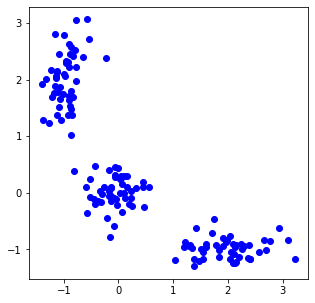

In [2]:
# Создадим примеры на плоскости с тремя кластерами
import numpy as np
from matplotlib import pyplot as plt
X = np.zeros((150, 2)) # 150 примеров по 50 на каждый кластер

np.random.seed(seed=42)
# первый кластер
X[:50, 0] = np.random.normal(loc=0.0, scale=.3, size=50) # Х координата примеров первого кластера
X[:50, 1] = np.random.normal(loc=0.0, scale=.3, size=50) # У координата примеров первого кластера
# второй кластер
X[50:100, 0] = np.random.normal(loc=2.0, scale=.5, size=50) # 
X[50:100, 1] = np.random.normal(loc=-1.0, scale=.2, size=50) #
# третий кластер
X[100:150, 0] = np.random.normal(loc=-1.0, scale=.2, size=50) #
X[100:150, 1] = np.random.normal(loc=2.0, scale=.5, size=50) #

plt.figure(figsize=(5, 5)) #
plt.plot(X[:, 0], X[:, 1], 'bo'); # рисуем


Нам надо считать расстояние от точек-примеров, до точек-центроидов, в библиотеке `scipy` есть замечательная функция `cdist()`, которая считает расстояния между парами точек из двух массивов, подающихся ей на вход. Создадим три центроида со случайными координатами и будем считать расстояния до них. 

Попробуйте и сравните случаи, когда мы угадали число кластеров и когда нет.

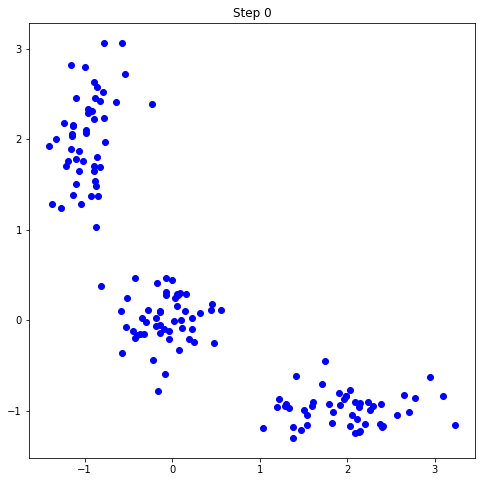

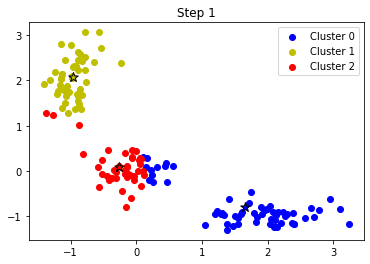

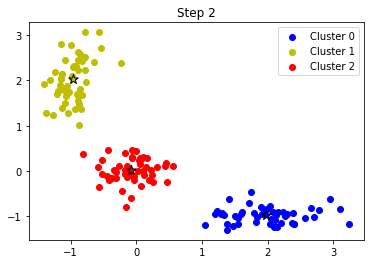

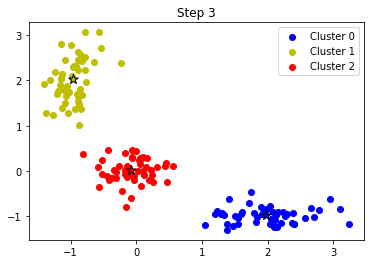

In [4]:

from scipy.spatial.distance import cdist # подключим функцию для расчета расстояний

M=3 # предполагаемое число кластеров 
np.random.seed(seed=42)
# Создадим 6 случайных чисел и получим центроиды (3 точки, каждая с двумя координатами)
centroids = np.random.normal(loc=0.0, scale=1., size=M*2)
centroids = centroids.reshape((M, 2))

cent_history = [] # для хранения истории изменения координат центроидов
cent_history.append(centroids) # заносим первый шаг

fig,ax=plt.subplots(figsize=(8, 8))
plt.scatter(X[:, 0], X[:, 1], marker='o',c='b') # рисуем изначальные данные
plt.title('Step 0');
plt.draw()
plt.pause(0.01)
color=['b','y','r','c','m'] # цвета для кластеров
N=3 # число итераций 
for i in range(N): # в цикле по числу итераций
    # Считаем расстояния от примеров до центроидов
    distances = cdist(X, centroids)
    # Ищем ближайшие центроиды для каждого примера
    labels = distances.argmin(axis=1) # это индексы ближайших центроидов

    # для каждого центроида пересчитываем его координаты как геометрический центр примеров, относящихся к нему
    centroids = centroids.copy() # копия центроидов
    for j in range(M): # цикл по количеству центроидов
        centroids[j, :] = np.mean(X[labels == j, :], axis=0) # среднее значения координат примеров для этого центроида 
        plt.scatter(X[labels == j, 0], X[labels == j, 1], marker='o', label='Cluster '+str(j),c=color[j]) # рисуем данные для текущего кластера
        plt.scatter(centroids[j, 0],centroids[j, 1],marker='*',s=100,c=color[j],edgecolors='black') # рисуем звездочкой центроид текущего кластера
        
    cent_history.append(centroids) # добавляем координаты центроидов в историю
    plt.title('Step {:}'.format(i + 1)); # подписываем график
    plt.legend()
    plt.draw()
    plt.pause(0.01)   

Этот же алгоритм реализован в функции [`KMeans`](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html)  модуля  [`cluster`](https://scikit-learn.org/stable/modules/classes.html#module-sklearn.cluster) библиотеки `sklearn`.
 
 
 Указываем аргументы:
 * `n_clusters` - предполагаемое число кластеров
 * `max_iter` - максимальное число итераций
 * `tol` - относительная точность изменения положения центроидов, после достижения которой процесс остановится  
 * `init` - способ расчета начального положения центроидов  
 * `n_init` - число раз, сколько будет запускаться кластеризация с разным выбором начального положения центроидов, в результат отображается лучший
 * и другие
 
 Обладает атрибутами:
 * `cluster_centers_` - центры кластеров
 * `labels_` - метки кластеров для каждой точки примера
 * `inertia_` - сумма квадратов расстояний от точек примеров до их центроидов (косвенно показывает насколько хороша кластеризация) 
 * `n_iter_` - число итераций обучения
 
Реализованные методы в целом аналогичны по смыслу и синтаксису PCA: `fit()`, `fit_predict()`, `fit_transform()`, `predict()`, `transform()`, `score()` и др. `transform()` переводит каждый пример в пространство "кластеров", т.е. сообщает расстояния от примера до каждого центроида. 
 
Посмотрим, как влияет предполагаемое число кластеров на косвенную ошибку работы (атрибут `inertia_`) алгоритма, но отметьте, что это очень косвенная ошибка, она не отражает на прямую действительное качество работы, нельзя утверждать, что чем меньше, тем лучше кластеризация.   

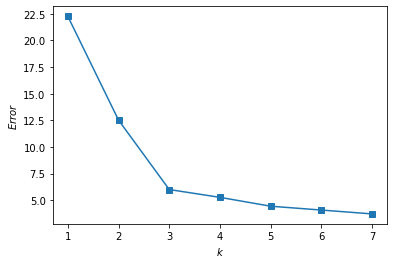

In [5]:
from sklearn.cluster import KMeans # подключаем KMeans кластеризацию

inertia = [] # здесь будем накапливать ошибки
for k in range(1, 8): # 
    kmeans = KMeans(n_clusters=k, random_state=1).fit(X) # создаем и обучаем кластеризатор с заданным числом кластеров
    inertia.append(np.sqrt(kmeans.inertia_)) # смотрим на ошибку, добавляем ее в историю

plt.plot(range(1, 8), inertia, marker='s'); # строим график ошибки
plt.xlabel('$k$') #
plt.ylabel('$Error$'); #

### Пример кластеризации и метрик кластеризации
`inertia_` очень косвенно отражает качество кластеризации, лучше использовать другие метрики из модуля [`metrics`](https://scikit-learn.org/stable/modules/clustering.html#clustering-evaluation), но ни одна из них не является универсальной. Что именно означает та или иная метрика оставим на потом, сейчас просто используем их.

Давайте попробуем кластеризировать набор данных с рукописными цифрами, надеясь, что каждая цифра попадет в свой кластер. Пространство изображений цифр довольно большое (8 на 8 = 64 пикселя), поэтому уменьшим его размерность с помощью PCA и уже в этом меньшем пространстве будем проводить кластеризацию. 

Совпадают ли классы и кластеры? Посмотрите на результат и увидите, что не очень, но некоторые совпадают хорошо.



In [6]:
from time import time # для замеров времени
import numpy as np
import matplotlib.pyplot as plt

from sklearn import metrics # модуль с различными метриками 
from sklearn.cluster import KMeans # кластеризация 
from sklearn.datasets import load_digits # набор данных
from sklearn.decomposition import PCA # PCA
from sklearn.preprocessing import scale # для предобработки изображений, масштаб

np.random.seed(42)

X_digits, y_digits = load_digits(return_X_y=True)# загружаем данные
data = scale(X_digits) # предобработка, масштабируем данные, приводя к нулевому среднему и единичной дисперсии

n_samples, n_features = data.shape # число примеров и число признаков
n_digits = len(np.unique(y_digits)) # число уникальных классов
labels = y_digits

sample_size = 300

print("n_digits: %d, \t n_samples %d, \t n_features %d"
      % (n_digits, n_samples, n_features))

# заголовок для таблички результатов
print(82 * '_')
print('init\t\ttime\tinertia\thomo\tcompl\tv-meas\tARI\tAMI\tsilhouette')

# функция для расчета метрик
def bench_k_means(estimator, name, data):
    # принимает кластеризатор, его название, данные
    t0 = time() # старт таймера
    estimator.fit(data) # обучаем кластеризатор
    # вычисляем метрики и отображаем их
    print('%-9s\t%.2fs\t%i\t%.3f\t%.3f\t%.3f\t%.3f\t%.3f\t%.3f'
          % (name, (time() - t0), estimator.inertia_,
             metrics.homogeneity_score(labels, estimator.labels_),
             metrics.completeness_score(labels, estimator.labels_),
             metrics.v_measure_score(labels, estimator.labels_),
             metrics.adjusted_rand_score(labels, estimator.labels_),
             metrics.adjusted_mutual_info_score(labels,  estimator.labels_),
             metrics.silhouette_score(data, estimator.labels_,
                                      metric='euclidean',
                                      sample_size=sample_size)))
# тест для k-means в котором используется улучшенный выбор начальной расстановки центроидов
bench_k_means(KMeans(init='k-means++', n_clusters=n_digits, n_init=10),
              name="k-means++", data=data)
# тест для k-means  в котором центроиды изначально выбраны случайно из данных
bench_k_means(KMeans(init='random', n_clusters=n_digits, n_init=10),
              name="random", data=data)

# тест для k-means  в котором начальные центроиды выбраны как главные компоненты PCA
pca = PCA(n_components=n_digits).fit(data) # вычисляем главные компоненты 
bench_k_means(KMeans(init=pca.components_, # используем главные компоненты как начальные положения центроидов
                     n_clusters=n_digits, n_init=1), # здесь начальные положения центроидов не изменяются, поэтому только 1 раз делаем кластеризацию
              name="PCA-based",
              data=data)
print(82 * '_')

n_digits: 10, 	 n_samples 1797, 	 n_features 64
__________________________________________________________________________________
init		time	inertia	homo	compl	v-meas	ARI	AMI	silhouette
k-means++	0.42s	69510	0.610	0.657	0.633	0.481	0.629	0.129
random   	0.37s	69907	0.633	0.674	0.653	0.518	0.649	0.131
PCA-based	0.09s	70768	0.668	0.695	0.681	0.558	0.678	0.142
__________________________________________________________________________________


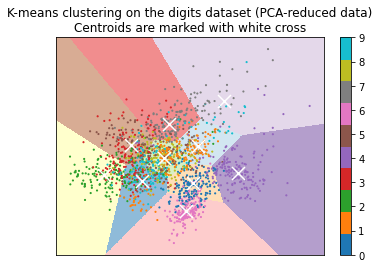

In [8]:
# Отдельно проведем и нарисуем кластеризацию для уменьшенного до двух с помощью PCA пространтсва признаков 
reduced_data = PCA(n_components=2).fit_transform(data) # создаем, обучаем и переводим признаки в двумерное пространство с помощью PCA  
kmeans = KMeans(init='k-means++', n_clusters=n_digits, n_init=10) # создаем кластеризатор
kmeans.fit(reduced_data) # обучаем его

# нарисуем разделяющую поверхность для этого случая 
# для точек в пределах [x_min, x_max] на [y_min, y_max].
h = .02# шаг сетки.
  
# минимумы и максимумы данных
x_min, x_max = reduced_data[:, 0].min() - 1, reduced_data[:, 0].max() + 1
y_min, y_max = reduced_data[:, 1].min() - 1, reduced_data[:, 1].max() + 1
# создаем сетку данных
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

# для каждой точки сетки считаем к какому кластеру она относится (ближайший).
Z = kmeans.predict(np.c_[xx.ravel(), yy.ravel()])

# изменяем форму массива для рисования
Z = Z.reshape(xx.shape)
plt.figure(1)
plt.clf()
# рисуем области разделяющей поверхности
plt.imshow(Z, interpolation='nearest',
           extent=(xx.min(), xx.max(), yy.min(), yy.max()),
           cmap=plt.cm.Paired,
           aspect='auto', origin='lower', alpha=0.5)
# рисуем центроиды
centroids = kmeans.cluster_centers_
plt.scatter(centroids[:, 0], centroids[:, 1],
            marker='x', s=169, linewidths=3,
            color='w', zorder=10)
# рисуем данные
digitN=labels
# раскоментируйте две строчки ниже, если хотите посмотреть только на одну цифру
#P=6 # номер цифры
#digitN = np.ma.masked_where(labels != P, labels) # массив с маской для этой цифры
plt.scatter(reduced_data[:, 0], reduced_data[:, 1],
            marker='.', s=5, c=digitN, cmap='tab10')

plt.title('K-means clustering on the digits dataset (PCA-reduced data)\n'
          'Centroids are marked with white cross')
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.xticks(())
plt.yticks(())
plt.colorbar()
plt.show()

# Другие методы кластеризации
Существуют и другие методы кластеризации, мы не будем вдаваться в подробности их устройства, но использовать можем, вызывая соответствующие функции модуля [`cluster`](https://scikit-learn.org/stable/modules/classes.html#module-sklearn.cluster). Найти описание методов можно по их названию в справке.

Сравним разные виды кластеризации на примерах рукописных цифр из MNIST. Обратите внимание, что синтаксис вызова разных методов совпадает.  

In [9]:
from sklearn import metrics # метрики
from sklearn import datasets # набор данных
import pandas as pd # для работы с таблицами
from sklearn.cluster import KMeans, AgglomerativeClustering, AffinityPropagation, SpectralClustering # разные методы кластеризации, добавьте и другие 

data = datasets.load_digits() # загружаем данные
X, y = data.data, data.target # входы и  ненужные нам указания учителя 

algorithms = [] # будем добавлять методы кластеризации
algorithms.append(KMeans(n_clusters=10, random_state=1)) # метод к-средних
algorithms.append(AffinityPropagation()) # метод на основе афинных преобразований
algorithms.append(SpectralClustering(n_clusters=10, random_state=1,
                                     affinity='nearest_neighbors')) # метод на основе спектров
algorithms.append(AgglomerativeClustering(n_clusters=10)) # еще какой-то метод
# добавьте сюда и другие

data = [] #
for algo in algorithms: # для каждого метода
    algo.fit(X) # обучаем его (выполняем кластеризацию)
    # считаем и добавляем метрики
    data.append(({
        'ARI': metrics.adjusted_rand_score(y, algo.labels_), # какие-то метрики ...
        'AMI': metrics.adjusted_mutual_info_score(y, algo.labels_),
        'Homogenity': metrics.homogeneity_score(y, algo.labels_),
        'Completeness': metrics.completeness_score(y, algo.labels_),
        'V-measure': metrics.v_measure_score(y, algo.labels_),
        'Silhouette': metrics.silhouette_score(X, algo.labels_)}))

# оформляем результат как табличку   
results = pd.DataFrame(data=data, columns=['ARI', 'AMI', 'Homogenity',
                                           'Completeness', 'V-measure', 
                                           'Silhouette'],
                       index=['K-means', 'Affinity', 
                              'Spectral', 'Agglomerative'])

results # отображаем ее

,ARI,AMI,Homogenity,Completeness,V-measure,Silhouette
K-means,0.668587,0.741156,0.739464,0.748061,0.743737,0.182524
Affinity,0.175174,0.612460,0.958907,0.486901,0.645857,0.115197
Spectral,0.756461,0.852040,0.831691,0.876614,0.853562,0.182729
Agglomerative,0.794003,0.866832,0.857513,0.879096,0.868170,0.178497


Похожим образом можно работать с любым методом кластеризации из `sklearn`.

## Избранные методы кластеризации
Некоторые методы кластеризации рассмотрим чуть более подробно.

### Иерархическая кластеризация

Строит иерархию кластеров. Этот алгоритм начинает работу с того, что каждому экземпляру данных сопоставляется свой собственный кластер. Затем два "ближайших" кластера объединяются в один и так далее, пока не будет образован один общий кластер. На картинке ниже сначала все точки (обозначены буквами) находятся в своем кластере, затем наиболее близкие E и F объединяются в один кластер, затем объединяются следующие по близости A и B, смотрим дальше, точка D ближе к объединенному кластеру точек E и F, затем к ним в новый кластер добавляется точка C и наконец кластер AB с этим кластером соединяется в один.

![img](https://drive.google.com/uc?id=1SMcaFjCDb3LJjSzS6CmagtXPvS1aOywN)

Так было построено множество кластеров в некоторой иерархии, которую можно представить и нарисовать с помощью дендрограммы, где показаны точки и номер итерации когда они соединились. Когда такая дендограмма создана, можем выбрать какие из кластеров нам подходят.

Есть очень существенное отличие от метода К-средних, здесь мы можем построить кластеры только на тех данных, на которых обучались, а если поступят новые данные, то придется делать кластеризацию заново (в принципе можно придумать как поступить в этом случае, но в библиотеке это не реализовано, нет метода `predict()`). 

Этот вид кластеризации реализован в [`AgglomerativeClustering`](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.AgglomerativeClustering.html#sklearn.cluster.AgglomerativeClustering) библиотеки `sklearn` и [`scipy.cluster.hierarchy.linkage`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.cluster.hierarchy.linkage.html#scipy.cluster.hierarchy.linkage) библиотеки `scipy`.

Рассмотрим этот тип кластеризации на примере данных для различных видов зерна из загруженного [набора данных](http://qps.ru/jNZUT).

По результатам видно, что кластеры в целом создаются верно, соответствуют виду (классу) зерна, но есть ошибки (например Kama wheat) которые попали не в свои кластеры.

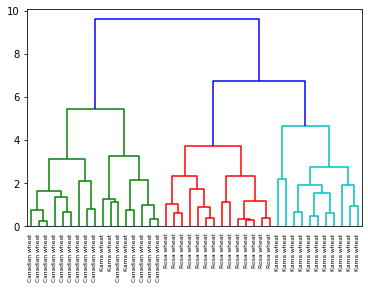

In [10]:
# Импортируем библиотеки
from scipy.cluster.hierarchy import linkage, dendrogram
import matplotlib.pyplot as plt
import pandas as pd

# Создаем датафрейм для загруженного набора данных
seeds_df = pd.read_csv(
"ML_School/seeds-less-rows.csv")

# Исключаем информацию об образцах зерна, сохраняем для дальнейшего использования
varieties = list(seeds_df.pop('grain_variety'))

# Извлекаем измерения как массив NumPy
samples = seeds_df.values

# Реализация иерархической кластеризации при помощи функции linkage
mergings = linkage(samples, method='complete')

# Строим дендрограмму, указав параметры удобные для отображения
dendrogram(mergings,
           labels=varieties,
           leaf_rotation=90,
           leaf_font_size=6,
           color_threshold=6,
           )

plt.show()

## Метод кластеризации на основе плотности DBSCAN

Для К-means форма кластера значения не имеет, а число кластеров мы должны угадать сами. Это не очень правильно, поэтому нужны, методы, которые бы могли определять число кластеров и учитывать их форму. Один из вариантов сделать это - смотреть на *плотность* расположения данных. Если много примеров расположены рядом друг с другом, то они находятся в одном кластере, а если между ними большие промежутки, то вероятно в разных.

Один из самых известных и популярных методов кластеризации на основе плотности данных это DBSCAN (Density-Based Spatial Clustering of Applications with Noise), который, помимо всего прочего, может определять также и "шум" - данные не относящиеся ни к одному кластеру. 

Смысл его очень прост:

1) давайте возьмем некоторую точку и посмотрим на ее соседей, находящихся в пределах заданного радиуса eps, занесем всех соседей в список принадлежности кластеру.

2) Если таких соседей больше чем min_samples, то назовем точку "ядром" и занесем ее в список проверяемых, будем переходить от точке к ее соседям и заносить их в список кластера, пока не кончатся соседи. Таким образом в кластер попадут все соседние ядра и точки не ядра, но соседи этих ядер.

3) В данных могли остаться точки, которые мы еще не заносили в список соседей, возьмем любую из них, если она ядро, т.е. имеет больше чем min_samples соседей, создадим второй кластер, будем опять проверять все ядра соседей и заносить их в список принадлежности этому второму кластеру.

4) так повторяем много раз, пока есть не кластеризированные точки.

5) все точки какие не попали ни в один кластер занесем в специальный кластер, который назовем "шумом", понятно что там окажутся только точки не ядра.

Параметры радиус eps и число соседей min_samples являются параметрами алгоритма и их необходимо задавать, конечно они влияют на результат.

DBSCAN не зависит от начальных условий (их просто нет), но зависит от порядка проверки данных, это нужно помнить. DBSCAN кластеризирует только те точки, на которых и обучается, для новых примеров придется запускать кластеризацию по новому.

Реализован в [`cluster.DBSCAN`](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.DBSCAN.html?highlight=dbscan#sklearn.cluster.DBSCAN) (не путать с `cluster.dbscan`), позволяет указать аргументы `eps`, `min_samples` и др. Имеет важные атрибуты `labels_` которые показывают номер кластера для точки (-1 для шума) и методы `fit()` и `fit_predict()` (обратите внимание что `predict()` нет, поскольку с новыми примерами не работает)

Давайте посмотрим пример с ирисами, чтобы можно было нарисовать,  переведем с помощью PCA данные на плоскость (разумеется сам DBSCAN работает в пространстве любой размерности).

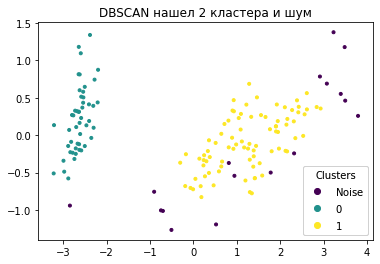

In [11]:
# Импортируем библиотеки
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt
from sklearn.cluster import DBSCAN # DBSCAN
from sklearn.decomposition import PCA
import numpy as np
# Загружаем данные
iris = load_iris()

# Создаем кластеризатор
dbscan = DBSCAN()

# Обучаем его (выполняем кластеризацию)
dbscan.fit(iris.data)

# Уменьшаем размерность при помощи метода главных компонент
pca = PCA(n_components=2).fit(iris.data)
pca_2d = pca.transform(iris.data)


N_cluster=dbscan.labels_.max()+1 # число найденных кластеров
if_noise=np.count_nonzero(dbscan.labels_==-1) # был ли найден шум (класс с меткой "-1")

fig, ax = plt.subplots()
# Рисуем в соответствии с найденными кластерами
scatter=ax.scatter(pca_2d[:, 0], pca_2d[:, 1],
                   c=dbscan.labels_, # метка кластера - цвет
                   marker='.')
# подпишем легенду
handles,labels=scatter.legend_elements() # указатели и подписи легенды 

if if_noise: # если найден шум
    labels[0]='$\\mathdefault{Noise}$' # первую подпись заменим (а она именно первая, поскольку упорядочены по возрастанию и шуму соответствует -1 )

legend1 = ax.legend(handles=handles, labels=labels,
                    loc="lower right", title="Clusters")
ax.add_artist(legend1)

if if_noise: # если найден шум
    plt.title('DBSCAN нашел {:} кластера и шум'.format(N_cluster))
else: # если не было шума
    plt.title('DBSCAN нашел {:} кластера без шума'.format(N_cluster))

plt.show()


Для проверки понимания, ответьте на вопрос, какую разделяющую поверхность между кластерами строит DBSCAN? Можем ли мы ее построить как делали для K-means?

<details> 
 <summary> <b>Ответ:</b> (нажмите)</summary>
 Нет, не можем, DBSCAN выполняется только для точек на которых и обучался, для новых точек плоскости мы не можем узнать к какому кластеру они относятся, кроме как выполнить метод еще раз.  
    
</details>
